<a href="https://colab.research.google.com/github/suwisitlk/229352-StatisticalLearning/blob/main/Lab05_decision_tree_bagging_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [3]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:
data.shape

(303, 14)

In [5]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [6]:
params = {'max_depth': [ 3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [11]:
a = gridcv.best_estimator_
a

DecisionTreeClassifier(max_depth=9)

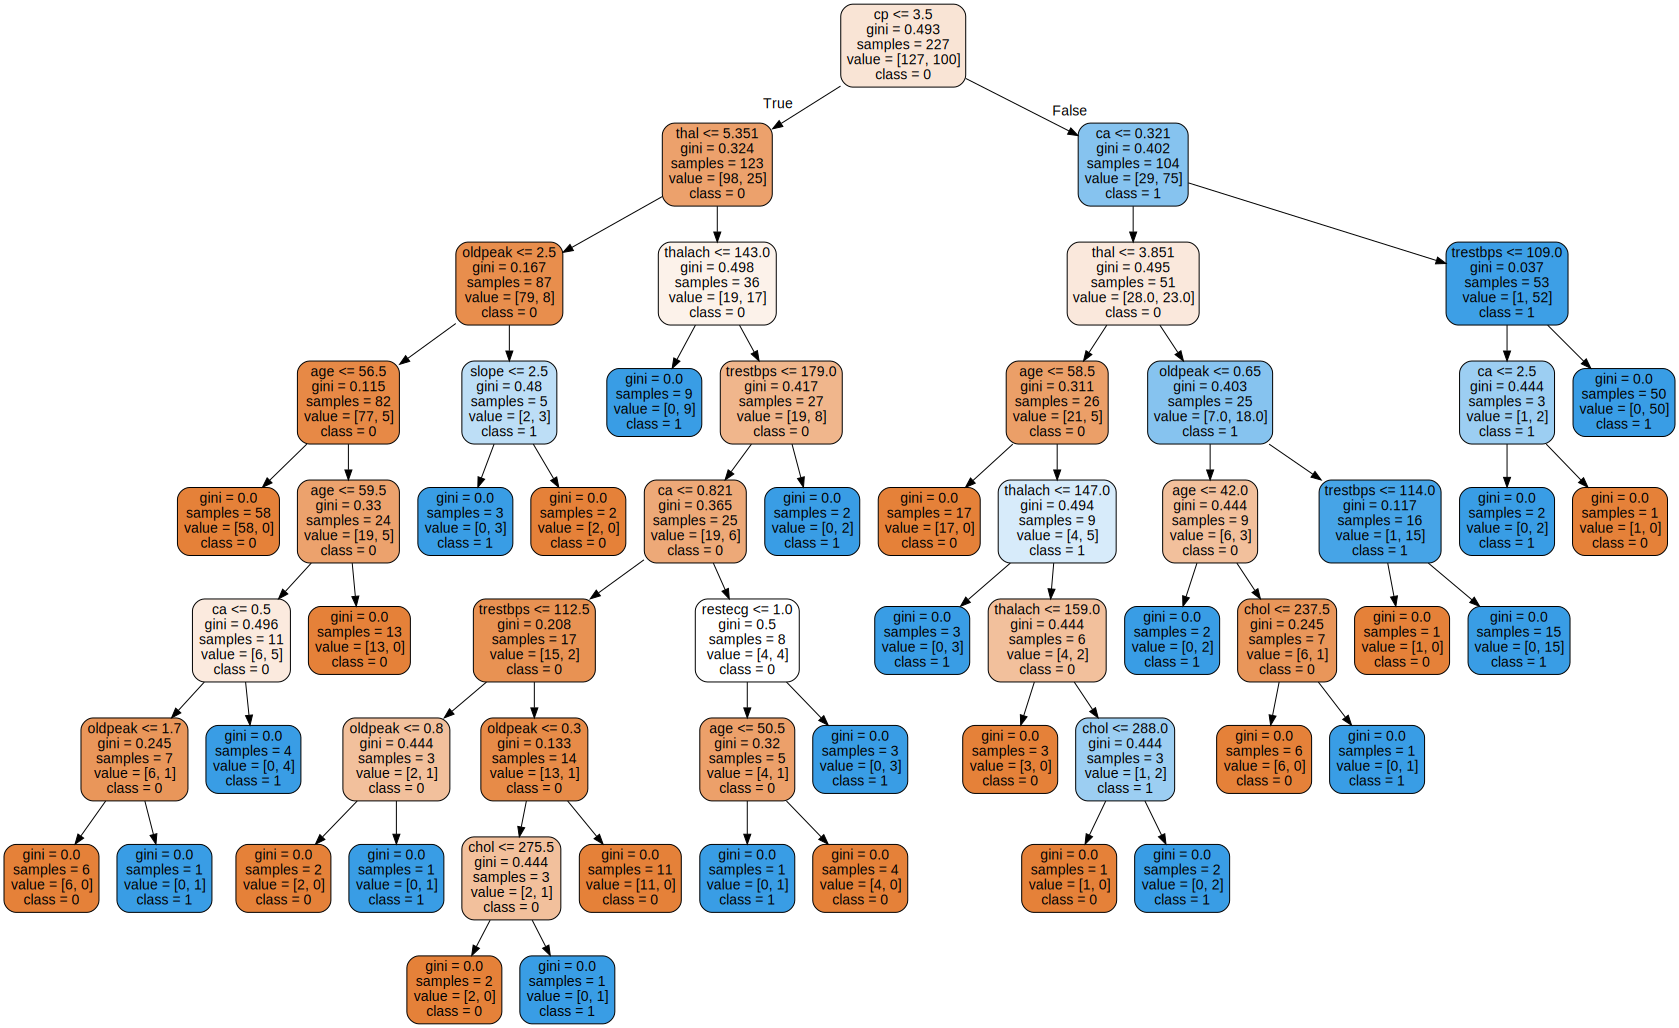

In [12]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],  #ไม่เอาคอลัมม์สุดท้ายเพราะเป็นตัวแปรตาม
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

In [13]:
from sklearn.metrics import classification_report

ypred = gridcv.predict(X_test)

print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76        37
           1       0.78      0.74      0.76        39

    accuracy                           0.76        76
   macro avg       0.76      0.76      0.76        76
weighted avg       0.76      0.76      0.76        76



## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [14]:
clf = DecisionTreeClassifier()

bagged_trees = BaggingClassifier(clf,                # 1. โมเดลพื้นฐาน (Base Estimator) ที่จะนำมาทำ Bagging เช่น DecisionTreeClassifier
                                 n_estimators=100,   # 2. จำนวนโมเดลย่อยที่จะสร้างขึ้นมา (ในที่นี้คือสร้างขึ้นมา 100 ตัว)
                                 max_samples=X_train.shape[0], # 3. จำนวนแถว (Data) ที่จะสุ่มไปใช้ในแต่ละโมเดลย่อย
                                 max_features=5)      # 4. จำนวนคอลัมน์ (Features) ที่จะสุ่มไปใช้ในแต่ละโมเดลย่อย

bagged_trees.fit(X_train, y_train)

ypred = bagged_trees.predict(X_test)

print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.72      0.84      0.78        37
           1       0.82      0.69      0.75        39

    accuracy                           0.76        76
   macro avg       0.77      0.77      0.76        76
weighted avg       0.77      0.76      0.76        76



## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [15]:
rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train, y_train)

ypred = rf.predict(X_test)

print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76        37
           1       0.79      0.69      0.74        39

    accuracy                           0.75        76
   macro avg       0.75      0.75      0.75        76
weighted avg       0.76      0.75      0.75        76



#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

#### 2.1 Decision tree

In [16]:
clf = DecisionTreeClassifier()

params = {
    'max_depth': [3, 6, 9, 12],          # ความลึกสูงสุดของต้นไม้ (ยิ่งลึกยิ่งซับซ้อน แต่เสี่ยง Overfit)
    'min_samples_split': [2, 5, 10],     # ควบคุมว่า "จะแตกกิ่งเพิ่มไหม?"
    'min_samples_leaf': [1, 2, 4]        # "ผลลัพธ์สุดท้ายต้องไม่เจาะจงคนกลุ่มน้อยเกินไป"
}

gridcv_clf = GridSearchCV(clf, params, scoring='f1_macro', cv=5)
gridcv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1_macro')

In [18]:
ypred_clf = gridcv_clf.predict(X_test)

print(classification_report(y_test, ypred_clf))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78        37
           1       0.81      0.74      0.77        39

    accuracy                           0.78        76
   macro avg       0.78      0.78      0.78        76
weighted avg       0.78      0.78      0.78        76



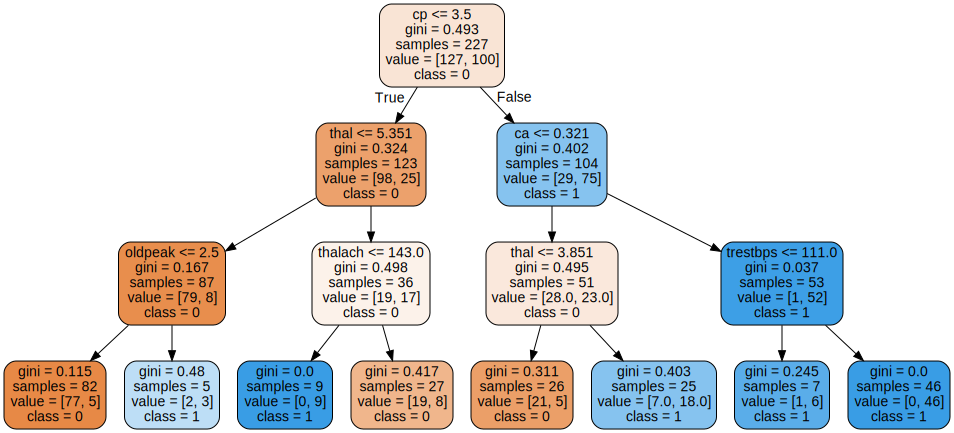

In [19]:
plot_data = export_graphviz(gridcv_clf.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

#### 2.2  Bagged Decision Trees

In [20]:
# ใช้ค่าจาก GridSearch รอบแรก
best_tree = gridcv_clf.best_estimator_
default_tree = DecisionTreeClassifier()

# ตัวหลักที่จะใช้ทำ GridSearch
bagged_model = BaggingClassifier()

params = {
    'estimator': [default_tree, best_tree],
    'n_estimators': [50, 100, 200],
    'max_samples': [0.7, 0.8, 1.0],
    'max_features': [0.7, 0.8, 1.0],
    'bootstrap': [True, False]
}

gridcv_bagged_trees = GridSearchCV(bagged_model, params, scoring='f1_macro', cv=5, n_jobs=-1)
gridcv_bagged_trees.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'estimator': [DecisionTreeClassifier(),
                                       DecisionTreeClassifier(max_depth=3,
                                                              min_samples_leaf=4)],
                         'max_features': [0.7, 0.8, 1.0],
                         'max_samples': [0.7, 0.8, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='f1_macro')

In [21]:
ypred_bagged_trees = gridcv_bagged_trees.predict(X_test)

print(classification_report(y_test, ypred_bagged_trees))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81        37
           1       0.85      0.74      0.79        39

    accuracy                           0.80        76
   macro avg       0.81      0.80      0.80        76
weighted avg       0.81      0.80      0.80        76



In [22]:
gridcv_bagged_trees.best_estimator_

BaggingClassifier(bootstrap=False,
                  estimator=DecisionTreeClassifier(max_depth=3,
                                                   min_samples_leaf=4),
                  max_features=0.8, max_samples=0.8, n_estimators=200)

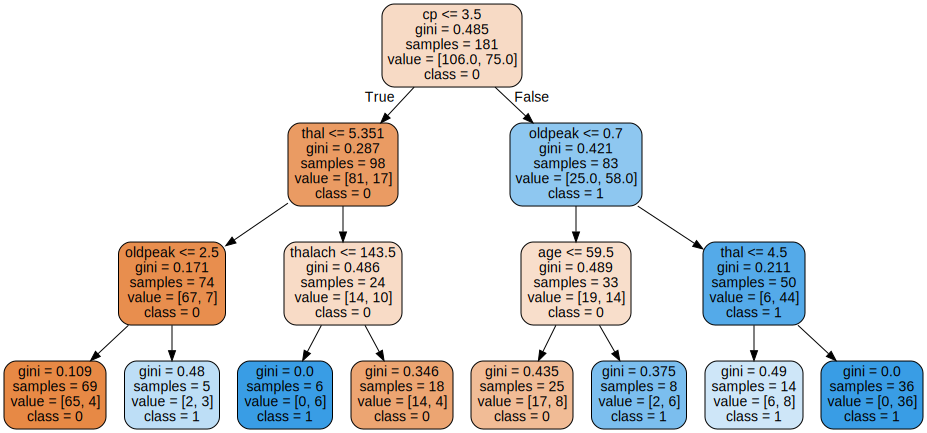

In [28]:
# 1. ดึงชื่อคอลัมน์เฉพาะที่ต้นไม้ต้นแรกมองเห็น (ยุบรวม index slicing)
m = gridcv_bagged_trees.best_estimator_
cols = data.columns[:-1][m.estimators_features_[0]]

# 2. พลอตทันที (ใช้ m[0] แทน estimators_[0] ได้เลย สั้นกว่า)
graphviz.Source(export_graphviz(m[0], feature_names=cols, out_file=None,
                                filled=True, rounded=True, class_names=['0','1']))


#### 2.3 Random Forest

In [40]:

tree_best_params = gridcv_clf.best_params_

rf = RandomForestClassifier(random_state=47)

params = {
    'n_estimators': [50, 100, 200],
    'max_depth':  [3, 5, 7, 9, 10, None],
    'min_samples_leaf':  [ 5, 10, 15],
    'max_features': ['sqrt', 'log2',0.3, 0.5, 0.7 ],
    'bootstrap': [True, False]
}


gridcv_rf = GridSearchCV(
    rf,
    params,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1 # ใช้ CPU ทุก Core เพื่อให้รันเร็วขึ้น
)

gridcv_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=47), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [3, 5, 7, 9, 10, None],
                         'max_features': ['sqrt', 'log2', 0.3, 0.5, 0.7],
                         'min_samples_leaf': [5, 10, 15],
                         'n_estimators': [50, 100, 200]},
             scoring='f1_macro')

In [41]:
ypred_rf = gridcv_rf.predict(X_test)

print(classification_report(y_test, ypred_rf))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        37
           1       0.86      0.77      0.81        39

    accuracy                           0.82        76
   macro avg       0.82      0.82      0.82        76
weighted avg       0.82      0.82      0.82        76



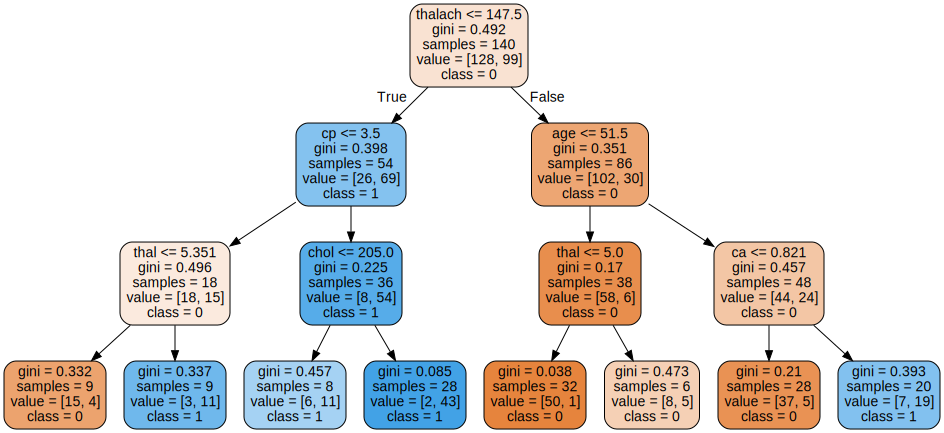

In [43]:
plot_data_rf= export_graphviz(gridcv_rf.best_estimator_[0],
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph_rf = graphviz.Source(plot_data_rf)
graph_rf

#### 3.For each model, compute the f1_macro and accuracy score on the test set.
*   Tree : `f1_macro:0.78` , `accuracy:0.78`
*   Bagging : `f1_macro:0.80` , `accuracy:0.80`
*   Random forest : `f1_macro:0.82` , `accuracy:0.82`

#### 3.1 What is your best model?
*  Random forest Model

#### 3.2 Plot the best tree model

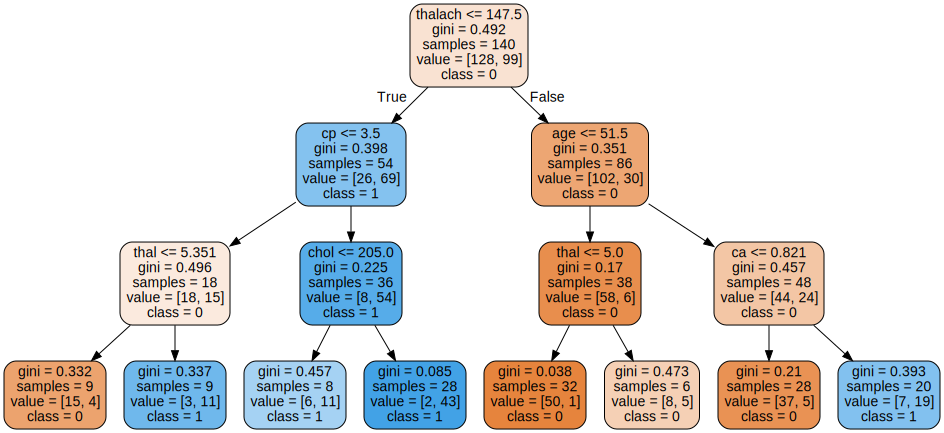

In [44]:
graph_rf

#### 3.3 What hyperparameters did you choose?

##### The reasons why I choosed these hyperparamters in Decision tree model
*  ` max_depth` : เพื่อตรวจสอบความลึกที่เหมาะสม
*   `min_samples_split` : เพื่อจำกัดจำนวนการแตกกิ่งที่ดีที่สุด
*   `min_samples_leaf` : เพื่อกำหนดขอบเขตไม่ให้เจาะจงจนกลุ่มน้อยเกินไป โดยระบุขอขเขตที่ดีที่สุด

##### The reasons why I choosed these hyperparamters in Bagged Decision Trees model
*  ` estimator`: เปรียบเทียบ "ต้นไม้ที่จูนแล้ว" กับ "ต้นไม้ทั่วไป" เพื่อหาฐานโมเดลที่ทำงานร่วมกันได้ดีที่สุด
*  ` n_estimators`: หาจำนวนโมเดลย่อยที่เหมาะสมเพื่อลดความแปรปรวน (Variance)ให้ผลทำนายเสถียร
*   `max_samples` & ` max_features`: สุ่มสัดส่วนข้อมูลและตัวแปร เพื่อสรางความหลากหลายและลดการยึดติดข้อมูลชุดเดิม
*   `bootstrap`: เลือกวิธีสุ่มแบบ ใส่คืน หรือ ไม่ใส่คืน ให้เหมาะกับลักษณะการกระจายตัวของข้อมูล

##### The reasons why I chose these hyperparameters in Random Forest model

*  `n_estimators`: เปรียบเทียบ "ต้นไม้ที่จูนแล้ว" กับ "ต้นไม้ทั่วไป" เพื่อหาฐานโมเดลที่ทำงานร่วมกันได้ดีที่สุด

*  `max_depth`: เพื่อควบคุมความลึกไม่ให้ต้นไม้จดจำข้อมูลมากเกินไป ป้องกันการเกิด Overfitting

*  `min_samples_leaf`: เพื่อกำหนดจำนวนข้อมูลขั้นต่ำในใบสุดท้าย ให้ผลลัพธ์มีความน่าเชื่อถือทางสถิติ ไม่เจาะจงกลุ่มน้อยจนเกินไป

*  `max_features`: เพื่อสุ่มตัวแปรที่จะใช้ในทุกจุดแยก (Node) บังคับให้ต้นไม้แต่ละต้นมองเห็นแง่มุมที่ต่างกันและสร้างความหลากหลาย

*  `bootstrap`: เพื่อเลือกระหว่างการสุ่มแบบใส่คืน (Bagging) หรือไม่ใส่คืน (Pasting) ให้เหมาะกับลักษณะการกระจายตัวของข้อมูลที่มีจำกัด

#### 3.4 What are the best values of your hyperparameters?

In [45]:
gridcv_rf.best_estimator_

RandomForestClassifier(max_depth=3, max_features=0.5, min_samples_leaf=5,
                       random_state=47)